# Estudo Algoritmos de Agrupamento.
- O objetivo deste notebook é realizar um breve estudo dos algoritmos: KMeans, AgglomerativeClustering (Agrupamento Hierárquico), GaussianMixture, DBSCAN do scikit-learn.
- Vamos utilizar nesse estudo o dataset 'credit-card-clients.csv'.
- Iremos fazer uma breve comparação entre os resultados destes dos algoritmos para esta base dados.
- Este dataset contém 24 atributos e 30.000 instâncias (linhas). 

  

In [1]:
# Importando as bibliotecas iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Importando o dataset
base = pd.read_csv('./credit-card-clients.csv', header = 1)

In [3]:
# Verificando o shape do dataset
base.shape

(30000, 25)

In [4]:
# Visualiza as primeira linhas
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Verificando os atributos núméricos.
base.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Pré-processamento - Tratamento dos dados

In [6]:
# Vamos criar uma coluna com a soma de todas as contas do cliente
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [7]:
# Seleciona os atributos previsores
# Vamos considerar somente o limite (LIMIT_BAL) e o gasto total (BILL_TOTAL).
atributos = base.iloc[:, [1,25]].values
atributos.shape

(30000, 2)

In [8]:
atributos

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

In [9]:
# StandardScaler para colocar todos os valores na mesma escala (escalonamento).
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
atributos = scaler.fit_transform(atributos)

# Criando os Modelos de Previsão para comparação

In [10]:
# Cria a função para calcular o centroide dos clusters
def cacular_centroide(x, y):
    return (np.sum(x)/len(x), np.sum(y)/len(y))

In [11]:
# Cria a função para Plotar os graficos dos agrupamentos
def plota_graficos_clusters(atributos, previsoes, nome_algoritmo):

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f','#bcbd22', '#17becf']    
    markers = ['*', '^', 'X', '+', 'D', 'H', 'o', '+', 's', 'v']
    
    plt.figure(figsize=(12,6))
    plt.title('Previsões Algoritmo' + nome_algoritmo)   

    for i in np.unique(previsoes):
                x = atributos[previsoes == i, 0]
                y = atributos[previsoes == i, 1]
                centroide = cacular_centroide(x,y)
                
                if i < 0:
                    nome =  'Sem Cluster ' + str(i)
                    plt.scatter(x, y, s = 100, c = 'gray', label = nome)
                    plt.scatter(centroide[0],  centroide[1], marker = markers[i+1], s = 100, c = 'black',  label = (nome + '-Centoide'))
                else:
                    nome = 'Cluster ' + str(i+1)          
                    plt.scatter(x, y, s = 100, c = colors[i], label =  nome)
                    plt.scatter(centroide[0],  centroide[1], marker = markers[i+1], s = 100, c = 'black', label = (nome + '-Centoide'))

    plt.xlabel('Limite')
    plt.ylabel('Gastos')
    plt.legend()
    plt.savefig(fname=nome_algoritmo +'.png', dpi=100)
    plt.show()  

# Criando o modelo com o Algoritmo de Agrupamento KMeans

Text(0, 0.5, 'WCSS')

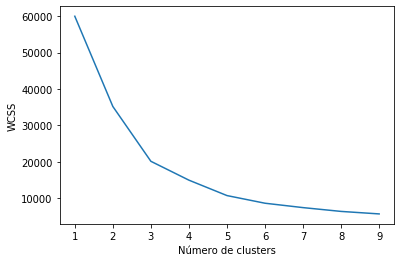

In [12]:
# Verificando a quantidade de Clusters ideal para este conjunto de dados.
# Basicamente existem três formas de fazer isso:
#    1 - Conhecimento Prévio da quatidade de Clusters;
#    2 - Sem conhecimento prévio da quatidade de Clusters, podemos usar a regra geral dada pela fórmula: cluters = Raiz quadrada de N/2, onde N é quatidade de registros;
#    3 - Utilizando o Elbow Method;
# Aqui vamos usar o Elbow Method (https://en.wikipedia.org/wiki/Elbow_method_(clustering))
# Após o valor indicado pelo “cotovelo” (curva acentuada) no gráfico indica que não possui ganho em relação ao aumento de clusters.
# Nesse ponto, significa que o método encontrou o número ideal para o argumento k.
# Obs: Nenhum destes métodos garante encontrar a quantidade ideal de cluters, para isso é necessário realizar diversos testes na base de dados.

# Para esse estudo vamos considerar o número de Clusters igual a 4.
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
from sklearn.cluster import KMeans

# Within cluster sum of squares
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(atributos)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [13]:
# Cria o modelo de agrupamgento KMeans

kmeans = KMeans(n_clusters = 4, random_state = 0)
previsoes_kmeans = kmeans.fit_predict(atributos)


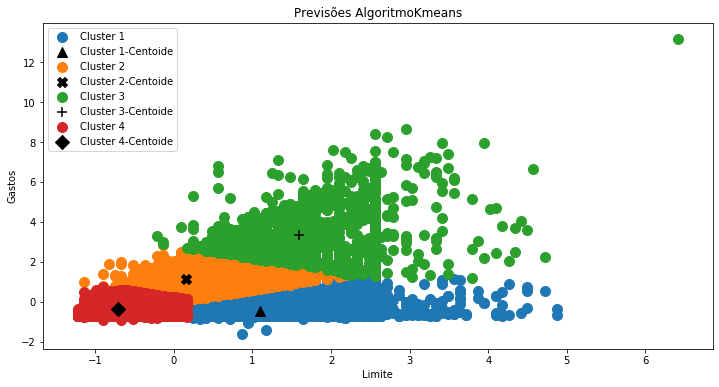

In [14]:
# Plota o grafico com os agrupamentos
plota_graficos_clusters(atributos ,previsoes_kmeans, 'Kmeans')

In [15]:
# Cria um Dataframe com a quantidade de registros de cada Cluster.

unicos, quantidade = np.unique(previsoes_kmeans, return_counts = True)  
df_kmeans = pd.DataFrame(data=quantidade, index=unicos, columns=['Qtd_Registros_Cluster'] )

# Cria a linha com o cáculo do Total de Registros
df_Total = pd.DataFrame(data=[round(df_kmeans.Qtd_Registros_Cluster.values.sum(),2)], index=['Total'], columns=df_kmeans.columns)

# Adiciona a linha do Total no Dataframe
df_kmeans = df_kmeans.append(df_Total)
df_kmeans.index.name = 'Cluster'
df_kmeans

,Qtd_Registros_Cluster
Cluster,
0,7952
1,4413
2,1298
3,16337
Total,30000


# Criando o modelo com o Algoritmo AgglomerativeClustering (Agrupamento Hierárquico)

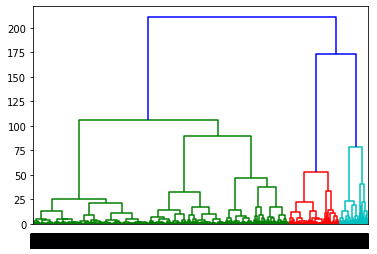

In [16]:
# Dendrograma é um tipo específico de representação icónica que organiza determinados fatores e variáveis (https://pt.wikipedia.org/wiki/Dendrograma).

# Dendograma – Visualizando a Análise de Cluster
# Usa-se o dendograma para visualizar o processo de clusterização passo a passo, assim como analisar os níveis de distância dos clusters formados. 
# Um bom ponto de decisão da clusterização final é onde os valores de distância mudam consideravelmente. 
# Para a decisão do agrupamento final também devem ser avaliados se os clusters formados fazem sentido para o problema.
# https://www.abgconsultoria.com.br/blog/o-que-e-analise-de-cluster/
 
# Para esse estudo vamos considerar o número de Clusters igual a 4.

from scipy.cluster.hierarchy import dendrogram, linkage

dendrograma = dendrogram(linkage(atributos, method = 'ward'))

In [17]:
# Cria o modelo de agrupamento Hierárquico
# https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
from sklearn.cluster import AgglomerativeClustering

aghier = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
previsoes_aghier = aghier.fit_predict(atributos)


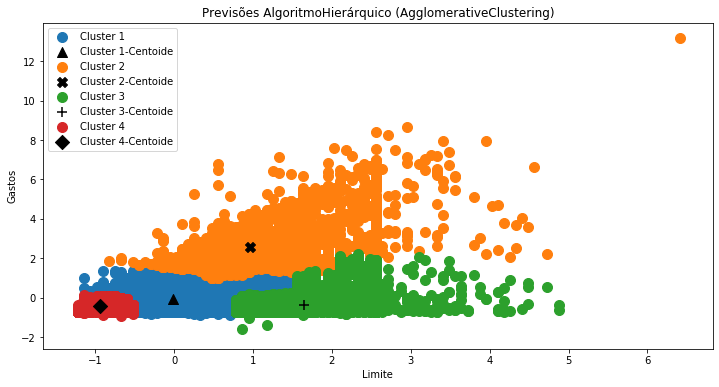

In [18]:
# Plota o grafico com os agrupamentos
plota_graficos_clusters(atributos ,previsoes_aghier, 'Hierárquico (AgglomerativeClustering)')

In [19]:
# Cria um Dataframe com a quantidade de registros de cada Cluster.

unicos, quantidade = np.unique(previsoes_aghier, return_counts = True)  
df_aghier = pd.DataFrame(data=quantidade, index=unicos, columns=['Qtd_Registros_Cluster'] )

# Cria a linha com o cáculo do Total de Registros
df_Total = pd.DataFrame(data=[round(df_aghier.Qtd_Registros_Cluster.values.sum(),2)], index=['Total'], columns=df_aghier.columns)

# Adiciona a linha do Total no Dataframe
df_aghier = df_aghier.append(df_Total)
df_aghier.index.name = 'Cluster'
df_aghier


,Qtd_Registros_Cluster
Cluster,
0,12566
1,2561
2,4480
3,10393
Total,30000


# Criando o modelo com o Algoritmo Agrupamento DBSCAN

In [20]:
# Para o algoritmo DBSCAN não é necessário definir o número de clusters, ele vai descobrir sozinho, mas para isso precisamos ajustar os parâmetros até encontrar o melhor conjunto.
# A seguir vamos fazer alguns testes para tentar encontrar o melhor conjunto de parâmetros. 
# https://scikit-learn.org/stable/modules/clustering.html#dbscan
from sklearn.cluster import DBSCAN

In [21]:
arquivo_teste_parametros_dbscan = 'Testes_Parametros_DBSCAN.csv'
colunas = ['Indice', 'QtdCluters', 'EPS', 'MIN_SAMPLES', 'DesvioPadrao', 'Variancia', 'Clusters', 'ElementosClusters', 'ExisteElementoSemCluster', 'QtdRegistroClusterMenosUm']

# Verifica se arquivo de testes de testes de parâmetros já existe
if os.path.isfile(arquivo_teste_parametros_dbscan):
    # Importar os dados dos testes de parâmetros.
    df_cfg = pd.read_csv('Testes_Parametros_DBSCAN.csv', usecols=colunas  )

else:
    # Testando alguns conjuntos de parâmetros para o Algoritmo Agrupamento DBSCAN.
    # Este teste é para nos ajudar a identificar o melhor conjundo de parâmetros para o algoritmo.
    lista_resultados = []
    indice = 0
    for i in range(2, 410):
        for j in range(3, 8):
            
            eps_i = i/100
            min_samples_j = j
            dbscan = DBSCAN(eps = eps_i, min_samples = min_samples_j)
            unicos, quantidade = np.unique(dbscan.fit_predict(atributos), return_counts = True)  
            
            ClusterMenosUm = (-1 in unicos)
            
            if ClusterMenosUm:
                QtdRegistroClusterMenosUm = quantidade[0]
                
            lista_resultados.append([indice, len(unicos), eps_i, min_samples_j , round(quantidade.std(), 2), round(quantidade.var(), 2), unicos , quantidade, ClusterMenosUm, QtdRegistroClusterMenosUm] )
            indice +=1       

    # Cria o Dataframe com o resultado dos testes de parâmetros para o Algoritmo Agrupamento DBSCAN.
    
    df_cfg = pd.DataFrame(lista_resultados, columns=colunas)
    # Salva o arquivo de testes de testes de parâmetros 
    df_cfg.to_csv('Testes_Parametros_DBSCAN.csv')
    

In [22]:
# Olhando o formato
df_cfg.shape

(2040, 10)

In [23]:
# Olhando as primeiras linhas
df_cfg.head()

,Indice,QtdCluters,EPS,MIN_SAMPLES,DesvioPadrao,Variancia,Clusters,ElementosClusters,ExisteElementoSemCluster,QtdRegistroClusterMenosUm
0,0,607,0.02,3,226.56,51328.39,[ -1 0 1 2 3 4 5 6 7 8 9 ...,[2088 1961 413 643 3347 1035 321 1168 279 ...,True,2088
1,1,429,0.02,4,282.51,79811.80,[ -1 0 1 2 3 4 5 6 7 8 9 ...,[2852 1961 413 643 3347 1035 321 1168 279 ...,True,2852
2,2,324,0.02,5,342.46,117280.06,[ -1 0 1 2 3 4 5 6 7 8 9 ...,[3565 1961 413 643 3347 1035 321 1168 279 ...,True,3565
3,3,269,0.02,6,391.99,153654.75,[ -1 0 1 2 3 4 5 6 7 8 9 ...,[4121 1961 374 642 3347 1035 257 1168 279 ...,True,4121
4,4,248,0.02,7,428.22,183375.50,[ -1 0 1 2 3 4 5 6 7 8 9 ...,[4676 1961 374 602 3347 1035 238 1087 722 ...,True,4676


In [24]:
# Aqui vamos tentar identificar com qual conjunto de parâmetros o algoritmo teve o melhor desempenho para esta base de dados.
# Vamos filtrar pelo quantidade de cluters e ordenar pelo desvio padrão.
df_cfg[(df_cfg.QtdCluters > 3)  & (df_cfg.QtdCluters < 8)].sort_values(by =['DesvioPadrao', 'QtdRegistroClusterMenosUm'] , ascending=True)

,Indice,QtdCluters,EPS,MIN_SAMPLES,DesvioPadrao,Variancia,Clusters,ElementosClusters,ExisteElementoSemCluster,QtdRegistroClusterMenosUm
72,72,7,0.16,5,10397.93,1.081169e+08,[-1 0 1 2 3 4 5],[ 168 29755 32 21 12 8 4],True,168
77,77,7,0.17,5,10403.62,1.082353e+08,[-1 0 1 2 3 4 5],[ 153 29769 32 21 13 8 4],True,153
76,76,7,0.17,4,10426.87,1.087196e+08,[-1 0 1 2 3 4 5],[ 133 29826 21 4 4 8 4],True,133
81,81,7,0.18,4,10428.90,1.087620e+08,[-1 0 1 2 3 4 5],[ 128 29831 21 4 4 8 4],True,128
101,101,7,0.22,4,10443.58,1.090683e+08,[-1 0 1 2 3 4 5],[ 107 29867 4 5 9 4 4],True,107
111,111,7,0.24,4,10447.64,1.091532e+08,[-1 0 1 2 3 4 5],[ 91 29877 6 9 8 4 5],True,91
116,116,7,0.25,4,10448.86,1.091786e+08,[-1 0 1 2 3 4 5],[ 82 29880 6 12 10 5 5],True,82
121,121,7,0.26,4,10451.71,1.092382e+08,[-1 0 1 2 3 4 5],[ 74 29887 7 11 10 6 5],True,74
141,141,7,0.30,4,10457.41,1.093574e+08,[-1 0 1 2 3 4 5],[ 56 29901 17 8 10 4 4],True,56
136,136,7,0.29,4,10457.41,1.093575e+08,[-1 0 1 2 3 4 5],[ 60 29901 9 8 8 10 4],True,60


In [25]:
# Verificando se existe algum teste onde todos os elementos foram adicionados a um cluster (-1  indica que o elemento ficou "fora" dos clusters criados ).
# Não conseguimos nenhuma configuração para este dataset onde todos os elementos foram adicionados a um cluster.
df_cfg[df_cfg.ExisteElementoSemCluster==False]

,Indice,QtdCluters,EPS,MIN_SAMPLES,DesvioPadrao,Variancia,Clusters,ElementosClusters,ExisteElementoSemCluster,QtdRegistroClusterMenosUm


In [26]:
# Para o algoritmo DBSCAN não é necessário definir o número de clusters, ele vai descobrir sozinho, mas para isso precisamos ajustar o parâmetros até achar o melhor conjunto. Fizemo Isso nos testes acima.
# Vamos selecionar os parâmetros onde tivemos o menor Desvio Padrão e o menor numero de elementos sem Cluster (que estão no Cluster -1).
# Nos testes a melhor configuração encontrada foi:
#        eps = 0.34
#        min_samples = 5
# Vamos usar ela para criar o modelo.

# Cria o modelo de agrupamento DBSCAN (Density Based Spatial Clustering of Applications with Noise) (https://en.wikipedia.org/wiki/DBSCAN)
dbscan = DBSCAN(eps = 0.34, min_samples = 4)
previsoes_dbscan = dbscan.fit_predict(atributos)

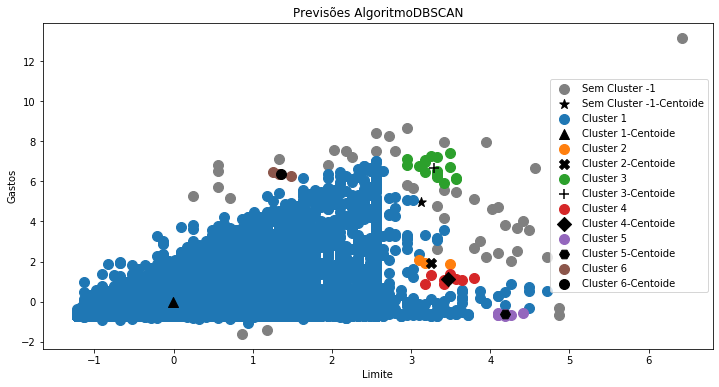

In [27]:
# Plota o grafico com os agrupamentos
plota_graficos_clusters(atributos ,previsoes_dbscan, 'DBSCAN')

In [28]:
# Cria um Dataframe com a quantidade de registros de cada Cluster.

unicos, quantidade = np.unique(previsoes_dbscan, return_counts = True)  
df_dbscan = pd.DataFrame(data=quantidade, index=unicos, columns=['Qtd_Registros_Cluster'] )

# Cria a linha com o cáculo do Total de Registros
df_Total = pd.DataFrame(data=[round(df_dbscan.Qtd_Registros_Cluster.values.sum(),2)], index=['Total'], columns=df_dbscan.columns)

# Adiciona a linha do Total no Dataframe
df_dbscan = df_dbscan.append(df_Total)
df_dbscan.index.name = 'Cluster'
df_dbscan


,Qtd_Registros_Cluster
Cluster,
-1,44
0,29916
1,3
2,17
3,8
4,9
5,3
Total,30000


# Criando o modelo com o Algoritmo Gaussian mixture

In [29]:
from sklearn import mixture

# https://scikit-learn.org/stable/modules/mixture.html#mixture
# Para esse estudo vamos considerar o número de Clusters também igual a 4.

gmm = mixture.GaussianMixture(n_components=4, covariance_type='full')
previsoes_gaussian = gmm.fit_predict(atributos)          


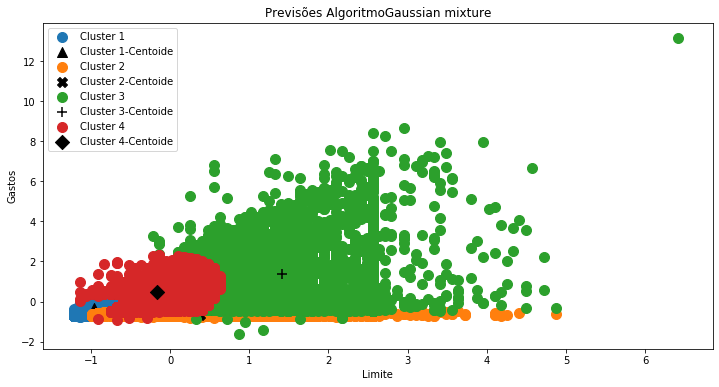

In [30]:
plota_graficos_clusters(atributos ,previsoes_gaussian, 'Gaussian mixture')

In [31]:
# Cria um Dataframe com a quantidade de registros de cada Cluster.
unicos, quantidade = np.unique(previsoes_gaussian, return_counts = True)  
df_gaussian = pd.DataFrame(data=quantidade, index=unicos, columns=['Qtd_Registros_Cluster'] )

# Cria a linha com o cáculo do Total de Registros
df_Total = pd.DataFrame(data=[round(df_gaussian.Qtd_Registros_Cluster.values.sum(),2)], index=['Total'], columns=df_gaussian.columns)

# Adiciona a linha do Total no Dataframe
df_gaussian = df_gaussian.append(df_Total)
df_gaussian.index.name = 'Cluster'
df_gaussian

,Qtd_Registros_Cluster
Cluster,
0,9004
1,9879
2,4280
3,6837
Total,30000


# Verificando a performance dos Modelos

In [32]:
# Abaixo vamos plotar os gráficos dos resultados dos Algoritmos para este dataset para nos ajudar na comparação.

In [33]:
from IPython.display import HTML, display

print('\nVisualizandos os Resultados do Algoritmos Graficamente\n')

display(HTML("<table><tr><td><img height='700' width='700' src='Kmeans.png'></td><td><img height='700' width='700' src='Hierárquico (AgglomerativeClustering).png'></td></tr><tr><td><img height='700' width='700' src='DBSCAN.png'></td><td><img height='700' width='700' src='Gaussian mixture.png'></td></tr></table>"))



Visualizandos os Resultados do Algoritmos Graficamente



,
,


In [34]:
from IPython.display import display_html

# Define a função para exibir os dataframes lado a lado.
def display_daframes(lista_dataframes, nomes=[]):
    html_str = ''
    if nomes:
        html_str += ('<tr>' +  ''.join(f'<td style="text-align:center"><span style=" font-weight: bold">{name}</span></td>' for name in nomes) +   '</tr>')
    
    html_str += ('<tr>' +  ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>'    for df in lista_dataframes) +  '</tr>')
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    
    display_html(html_str, raw=True)

In [35]:
print('\nVisualizando a distribuição dos registros nos clusters\n')
display_daframes([df_kmeans, df_aghier, df_dbscan, df_gaussian], ['Kmeans', 'Hieráquico', 'DbScan', 'Gaussian'])


Visualizando a distribuição dos registros nos clusters



Kmeans Hieráquico DbScan Gaussian 
 
 
 
 Qtd_Registros_Cluster 
 
 
 Cluster 
 
 
 
 
 
 0 
 7952 
 
 
 1 
 4413 
 
 
 2 
 1298 
 
 
 3 
 16337 
 
 
 Total 
 30000 
 
 
 
 
 
 
 Qtd_Registros_Cluster 
 
 
 Cluster 
 
 
 
 
 
 0 
 12566 
 
 
 1 
 2561 
 
 
 2 
 4480 
 
 
 3 
 10393 
 
 
 Total 
 30000 
 
 
 
 
 
 
 Qtd_Registros_Cluster 
 
 
 Cluster 
 
 
 
 
 
 -1 
 44 
 
 
 0 
 29916 
 
 
 1 
 3 
 
 
 2 
 17 
 
 
 3 
 8 
 
 
 4 
 9 
 
 
 5 
 3 
 
 
 Total 
 30000 
 
 
 
 
 
 
 Qtd_Registros_Cluster 
 
 
 Cluster 
 
 
 
 
 
 0 
 9004 
 
 
 1 
 9879 
 
 
 2 
 4280 
 
 
 3 
 6837 
 
 
 Total 
 30000

In [36]:
# Cria um dataframe com os registros da base e adiciona uma coluna com o cluster criado para o registro por cada aprevisoes_kmeansf_base_clusters = base
df_base_clusters = base
df_base_clusters['Cluster_Kmeans'] = previsoes_kmeans
df_base_clusters['Cluster_Hieraquico'] = previsoes_aghier
df_base_clusters['Cluster_DBSCAN'] = previsoes_dbscan
df_base_clusters['Cluster_Gaussian'] = previsoes_gaussian

In [37]:
df_base_clusters.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL,Cluster_Kmeans,Cluster_Hieraquico,Cluster_DBSCAN,Cluster_Gaussian
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,7704,3,3,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,17077,3,0,0,1
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,101653,3,3,0,3
3,4,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,231334,3,3,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,109339,3,3,0,0


# Conclusão:



Neste breve estudo os algoritmos de agrupamento que melhor se adaptaram aos dados, apenas visualizando os gráficos, foram os algoritmos 'Kmeans' e 'AgglomerativeClustering' (hierárquico). O algoritmo 'GaussianMixture' teve um resultado um pouco pior que os dois anteriores. Já o algoritmo 'DBSCAN' não conseguiu se adaptar muito bem para esta base de dados.


Aqui é importante fazer uma observação: 

Determinar qual é o melhor algoritmo não é uma tarefa trivial, pois para determinarmos qual realmente o melhor algoritmo para esta base de dados, precisaríamos efetuar testes mais exaustivos, como por exemplo ajustes nos hype parâmetros dos algoritmos, realizar o validação cruzada, análise dos os valores inter-clusters (maior a heterogeneidade entre os grupos) e intra-clusters (maior a homogeneidade dos registros dentro de grupos) e etc.

Também é importante destacar que em aplicações reais essa escolha dever levar em consideração a relevância dos resultados obtidos para o objetivo desejado.
